<a href="https://colab.research.google.com/github/infinite-darkness108/CommandMate/blob/main/Build_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install and import 

In [ ]:
%%capture
!pip install pytube
!pip install moviepy
!pip install pydub

import pandas as pd
import numpy as np
from plotnine import *
from pytube import YouTube
from moviepy.editor import *
import os
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pydub
from sklearn.cluster import KMeans

dataset collection for speaker1

In [ ]:
url = 'https://www.youtube.com/watch?v=qSCxH_pjQos&list=PLD_FjtL1MxijdqKNs2c7oTKxaTNLX4uws&index=18&t=1719s'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/PM Modis Mann Ki Baat with the Nation September 2020.mp4'
wav_filename = "PM.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('PM.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
X = z.fit_transform(df_filtered)

X = pd.DataFrame(X)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.409815,0.008623,0.263374,0.649605,1.121974,0.311476,-1.347144,-0.456970,1.299162,-0.271081,-1.141349,0.436857,1.130193,0.224147,0.784192,0.318567,-0.311553,0.249904,-0.228177,-1.077592
1,0.912150,0.576511,-0.701454,1.178724,2.367389,-1.000622,-0.237923,-1.667364,0.602787,0.355053,-2.395010,0.161724,0.980636,-0.740363,-0.822923,-0.025280,-2.358922,1.336104,1.395972,-0.501422
2,1.256055,0.649572,-0.667471,0.934397,2.232084,-1.191871,-0.117320,-1.532501,0.927533,0.885754,-2.530944,0.280414,0.878728,-1.358622,0.743049,1.431892,-1.165017,1.939203,-0.909704,-1.223265
3,0.949638,0.378225,-0.119752,0.806714,1.103090,0.507225,-0.886226,-1.788917,1.334714,0.604760,-2.431809,0.768288,0.138772,-0.438868,0.693945,-0.285732,-0.778492,1.851227,-0.085224,0.056029
4,0.632064,-0.193318,0.522703,1.334450,0.700582,2.080939,-1.083476,-0.710910,1.422082,0.240122,-0.532132,0.507150,-0.491405,-0.263320,0.939591,-0.390192,0.079452,0.796475,0.414227,-0.587502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184482,1.665943,-0.315415,0.195717,0.478499,-0.568645,0.552359,-0.037600,0.845458,0.738128,0.120550,0.610058,1.152981,0.776252,2.033180,1.359543,-0.191704,-0.193757,1.350985,2.298695,1.965309
184483,1.674279,-0.150141,0.248616,0.334774,-0.885983,1.245367,-0.133647,0.057798,-0.456239,0.344799,0.516480,0.994930,0.494509,0.904992,0.822228,0.667283,0.311989,1.646092,1.535507,0.792687
184484,-0.164082,-0.397606,-0.181818,-0.677023,-1.304154,-0.634412,0.770874,1.587700,-0.575716,-0.297308,0.856014,2.387074,0.558239,0.279177,0.871556,0.663023,0.733963,0.648510,-0.179760,0.367615
184485,-1.443016,-1.257541,0.489786,0.120547,0.410609,1.229435,0.931564,1.115230,1.144208,0.134739,0.691124,0.301400,-0.119993,0.300725,0.169406,-0.104107,0.331309,0.063479,0.124684,0.305532


dataset collection for speaker2

In [ ]:
url = 'https://www.youtube.com/watch?v=t6NS9unm-OQ&list=PLD_FjtL1MxijdqKNs2c7oTKxaTNLX4uws&index=19'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/Dont Tell Me Words Dont Matter--Obamas BEST speech YET!.mp4'
wav_filename = "PR.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('PR.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)

Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.224470,-2.221457,-0.213334,-0.575682,0.640561,0.321586,1.324445,0.242748,0.847587,-0.290694,-0.037609,-0.290888,0.102902,-0.641836,0.371487,-0.341435,0.248158,0.250912,0.652907,0.373681
1,-1.776792,-1.351718,0.242497,0.199191,0.388655,0.587882,1.463468,0.497097,1.062987,-0.299016,0.062572,-0.611877,1.060398,0.407477,0.495300,-0.599184,-0.567356,-0.190674,0.143190,0.078891
2,-1.459417,-1.445338,-0.016519,0.424353,0.741708,0.855870,1.328666,0.715998,1.530104,0.043106,-0.381187,-0.481292,0.503362,0.775299,1.244641,-0.336146,0.137423,-0.311315,0.574587,0.265894
3,-1.510136,-1.521629,-0.106801,-0.141091,0.561166,0.008549,0.433110,-0.187341,-0.144539,0.142016,0.425168,-0.252027,0.544079,0.138567,0.096976,-0.171760,-0.363587,-0.100507,0.429631,-1.098433
4,-1.353931,-1.048350,0.237435,0.619522,0.939864,0.591593,1.031175,0.794096,1.298512,0.309654,-0.363419,0.906865,1.558286,0.259377,-0.249878,-0.209091,0.610765,-0.409257,0.463403,-0.020221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,1.375659,1.063133,-1.757347,0.175873,-0.609976,1.263812,1.568286,0.098409,1.762110,3.103807,0.166374,-1.334968,-2.681408,-1.988844,-0.333808,-0.552896,-0.574093,-0.967062,-1.566645,-0.164976
48840,1.238621,0.891978,-1.335163,0.104209,-0.046564,1.697559,1.429592,0.140053,0.793639,2.550669,-0.190779,-0.475850,-2.204657,-1.761798,0.137613,-0.878337,-0.797332,-0.552239,-1.151401,0.718147
48841,0.273398,1.071108,-0.621847,0.863815,0.501851,1.468185,2.419085,0.453368,-0.117267,1.180790,-0.359666,-1.451229,-1.335369,-1.049389,0.691752,-0.480239,0.499209,0.721457,0.289714,-0.273150
48842,-1.110062,0.324808,-0.876660,-2.901938,0.744717,0.748326,0.333023,-0.106780,2.608732,1.423070,-0.180129,-0.875924,-0.463960,-2.003210,-0.664696,-0.347965,0.884343,0.467278,0.957245,1.361480


dataset collection for speaker2

In [ ]:
url = 'https://www.youtube.com/watch?v=0s7qtwJCPnc'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/(Français) 🇫🇷 France - President Addresses United Nations General Debate 77th Session  UNGA.mp4'
wav_filename = "FR.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'mp4')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('FR.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)

Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.049894,-0.040322,0.813619,-0.751567,-0.268642,0.126793,-0.427381,-1.517177,-0.057006,-1.153087,-1.444844,0.712094,1.285878,-0.832178,-0.962985,-0.831671,0.769825,0.467785,0.329058,0.059992
1,-0.685155,0.149989,1.235273,0.838385,-0.355491,0.466680,0.339373,-0.194479,0.829209,0.115245,-0.469295,0.460934,0.884217,-0.632724,-0.040419,-1.220845,0.342239,0.164761,-0.335610,-0.386139
2,-0.521858,0.258683,1.187047,0.938217,-0.341308,0.596175,0.200986,-0.623457,0.250044,0.219624,0.408622,0.579957,1.280112,-0.070246,-0.755344,-0.804871,0.028936,-0.402078,-0.027827,-0.397947
3,-0.469197,-0.221857,0.202266,0.819304,-0.576244,0.366175,0.261195,-0.088184,0.620699,0.237680,0.612425,1.154229,1.773281,0.320984,0.312761,0.427811,1.517263,0.918664,-0.503578,-0.613336
4,-0.034582,0.082767,0.145304,1.952779,0.490153,0.348301,0.762373,-0.804102,-0.084708,-0.140910,-1.729235,-1.321969,1.792460,0.859259,-0.497020,-0.318824,0.675342,1.440700,-0.508896,-1.113780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154259,-1.592176,-1.161427,0.449041,-0.696685,0.087627,0.241344,-0.213015,0.065518,1.311954,0.463652,0.273169,1.160583,1.586880,0.769157,0.969289,0.925147,1.151752,0.506544,0.761001,0.555625
154260,-1.591622,-1.159916,0.449281,-0.701266,0.076160,0.214391,-0.247889,-0.006049,1.251118,0.376666,0.144114,1.017716,1.417507,0.561414,0.773122,0.697217,0.949339,0.301545,0.584959,0.382514
154261,-1.591336,-1.158548,0.453574,-0.692026,0.091478,0.245808,-0.209009,0.073428,1.319755,0.477311,0.297788,1.192774,1.630514,0.828387,1.029229,0.997331,1.215727,0.568112,0.807511,0.589745
154262,-1.585290,-1.137039,0.491419,-0.645868,0.137688,0.305921,-0.160662,0.137485,1.354284,0.505829,0.315923,1.190988,1.606610,0.776224,0.961365,0.899738,1.114537,0.452571,0.697849,0.471212


# Initializing the variance and weights parameters in a GMM


1. Initialize the means using k-means clustering

In [ ]:
# number of clusters
k = 5
kmeans = KMeans(n_clusters=k)      ; KMEANS = KMeans(n_clusters=k)      ; kMEANS = KMeans(n_clusters=k)
kmeans.fit(X)                      ; KMEANS.fit(Y)                      ; kMEANS.fit(Z)

means1 = kmeans.cluster_centers_   ; means2 = KMEANS.cluster_centers_   ; means3 = KMEANS.cluster_centers_

2. Set the weights uniformly, such that each cluster has an equal prior probability of being chosen

In [ ]:
weights1 = [0.2 for i in range(k)] ; weights2 = [0.2 for i in range(k)] ; weights3 = [0.2 for i in range(k)]

3. Initialize the variances to the sample variance of the entire dataset or to a small constant value

In [ ]:
covariances1 = []                                         
index1 = []                                               
for i in np.linspace(0,len(X),k+1):
  index1.append(int(i))

for i in range(len(index1)-1):
  cc = np.cov(X[index1[i]:index1[i+1]].values.T)
  covariances1.append(cc)

covariances1 = np.array(covariances1)


covariances2 = []                                         
index2 = []                                               
for i in np.linspace(0,len(X),k+1):
  index2.append(int(i))

for i in range(len(index2)-1):
  cc = np.cov(X[index2[i]:index2[i+1]].values.T)
  covariances2.append(cc)

covariances2 = np.array(covariances2)

covariances3 = []                                         
index3 = []                                               
for i in np.linspace(0,len(X),k+1):
  index3.append(int(i))

for i in range(len(index3)-1):
  cc = np.cov(X[index3[i]:index3[i+1]].values.T)
  covariances3.append(cc)

covariances3 = np.array(covariances3)

define functions that are essential for EM algorithm

In [ ]:
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)
    diff = x - mean
    md = np.sqrt(diff.dot(cov_inv).dot(diff.T))
    return md

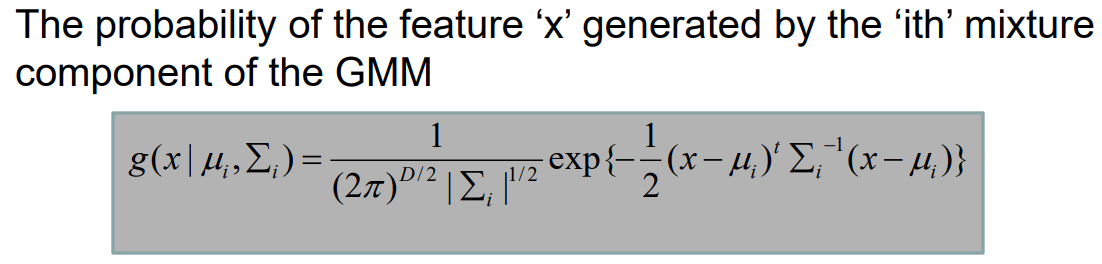

In [ ]:
def probability_data_in_cluster(x,i,means,covariances):
    if np.linalg.det(covariances[0])**(0.5) !=0: 
      return (1/(6.283185**(len(x)/2)))*(1/(np.linalg.det(covariances[i])**(0.5)))*(np.exp(0.5*mahalanobis_distance(x,means[i],covariances[i])))
    else:
      return (1/(6.283185**(len(x)/2)))*(1/(np.linalg.det(np.fill_diagonal(covariances[i], covariances[i].diagonal() + 1e-4))**(0.5)))*(np.exp(0.5*mahalanobis_distance(x,means[i],covariances[i])))

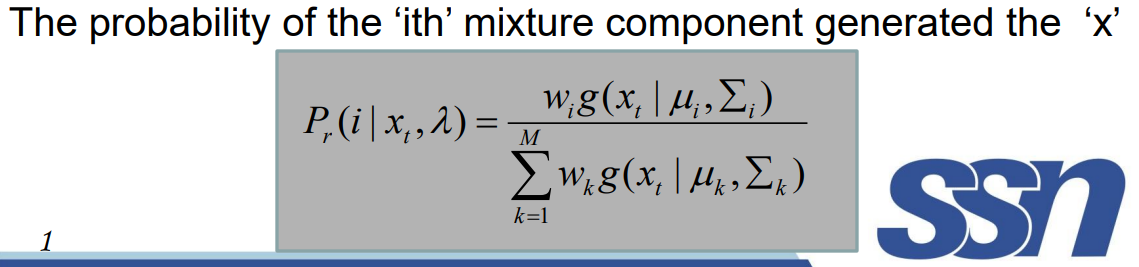

In [ ]:
def posterior_probability(i,x,means,covariances,weights):
  P = 0
  for j in range(k):
    P+= weights[j]*probability_data_in_cluster(x,j,means,covariances)
  
  return (weights[i]*probability_data_in_cluster(x,i,means,covariances))/P

# EM algorithm to estimate the GMM parameters based on the input data

1. The EM algorithm is an iterative algorithm that alternates between two steps: E and M step

2. In the E-step, we calculate the <font color='orange'>posterior probability</font> of each data point belonging to each cluster.

3. In the M-step, we update the estimates of the mean, covariance, and weight parameters of each cluster using the posterior probabilities calculated in the E-step. 

*   update the means to be the weighted average of the data points, where the weights are the posterior probabilities. 

*   update the covariances to be the weighted average of the squared deviations of the data points from the updated means, where the weights are the posterior probabilities.

*   update the weights to be the average of the posterior probabilities for each cluster.

4. Repeat these two steps until convergence, which is typically defined as either a maximum number of iterations or a small change in the log-likelihood of the data.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

n_clusters = len(means1)
log_likelihood = -np.inf
n_samples = len(X)
# convergence criteria
tolerance = 1e-4
max_iterations = 50

# iterate until convergence or maximum iterations
for i in range(max_iterations):
    #print("iteration number: ", i)
    # E-step: calculate the posterior probabilities
    log_probabilities = np.zeros((n_samples, n_clusters))
    for j in range(n_clusters):
       try: log_probabilities[:, j] = np.log(weights1[j]) + multivariate_normal.logpdf(X, means1[j], covariances1[j])
       except: log_probabilities[:, j] = np.log(weights1[j]) + multivariate_normal.logpdf(X, means1[j], np.fill_diagonal(covariances1[j], covariances1.diagonal() + tolerance))
    log_likelihood_new = np.sum(np.max(log_probabilities, axis=1))
    log_probabilities -= np.max(log_probabilities, axis=1)[:, np.newaxis]
    probabilities = np.exp(log_probabilities)
    probabilities /= np.sum(probabilities, axis=1)[:, np.newaxis]

    # M-step: update the model parameters
    N = np.sum(probabilities, axis=0)
    for j in range(n_clusters):
        means1[j] = np.sum(probabilities[:, j][:, np.newaxis] * X, axis=0) / N[j]
        diff = X - means1[j]
        covariances1[j] = np.dot(probabilities[:, j] * diff.T, diff) / N[j]
        weights1[j] = N[j] / n_samples

    # check for convergence
    if np.abs(log_likelihood_new - log_likelihood) < tolerance:
        break
    log_likelihood = log_likelihood_new


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

n_clusters = len(means2)
log_likelihood = -np.inf
n_samples = len(Y)
df_filtered
# convergence criteria
tolerance = 1e-4
max_iterations = 50

# iterate until convergence or maximum iterations
for i in range(max_iterations):
    #print("iteration number: ", i)
    # E-step: calculate the posterior probabilities
    log_probabilities = np.zeros((n_samples, n_clusters))
    for j in range(n_clusters):
       try: log_probabilities[:, j] = np.log(weights2[j]) + multivariate_normal.logpdf(Y, means2[j], covariances2[j])
       except: log_probabilities[:, j] = np.log(weights2[j]) + multivariate_normal.logpdf(Y, means2[j], np.fill_diagonal(covariances2[j], covariances2.diagonal() + tolerance))
    log_likelihood_new = np.sum(np.max(log_probabilities, axis=1))
    log_probabilities -= np.max(log_probabilities, axis=1)[:, np.newaxis]
    probabilities = np.exp(log_probabilities)
    probabilities /= np.sum(probabilities, axis=1)[:, np.newaxis]

    # M-step: update the model parameters
    N = np.sum(probabilities, axis=0)
    for j in range(n_clusters):
        means2[j] = np.sum(probabilities[:, j][:, np.newaxis] * Y, axis=0) / N[j]
        diff = Y - means2[j]
        covariances2[j] = np.dot(probabilities[:, j] * diff.T, diff) / N[j]
        weights2[j] = N[j] / n_samples

    # check for convergence
    if np.abs(log_likelihood_new - log_likelihood) < tolerance:
        break
    log_likelihood = log_likelihood_new

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

n_clusters = len(means3)
log_likelihood = -np.inf
n_samples = len(Z)
df_filtered
# convergence criteria
tolerance = 1e-4
max_iterations = 50

# iterate until convergence or maximum iterations
for i in range(max_iterations):
    #print("iteration number: ", i)
    # E-step: calculate the posterior probabilities
    log_probabilities = np.zeros((n_samples, n_clusters))
    for j in range(n_clusters):
       try: log_probabilities[:, j] = np.log(weights3[j]) + multivariate_normal.logpdf(Z, means3[j], covariances3[j])
       except: log_probabilities[:, j] = np.log(weights3[j]) + multivariate_normal.logpdf(Z, means3[j], np.fill_diagonal(covariances3[j], covariances3.diagonal() + tolerance))
    log_likelihood_new = np.sum(np.max(log_probabilities, axis=1))
    log_probabilities -= np.max(log_probabilities, axis=1)[:, np.newaxis]
    probabilities = np.exp(log_probabilities)
    probabilities /= np.sum(probabilities, axis=1)[:, np.newaxis]

    # M-step: update the model parameters
    N = np.sum(probabilities, axis=0)
    for j in range(n_clusters):
        means3[j] = np.sum(probabilities[:, j][:, np.newaxis] * Z, axis=0) / N[j]
        diff = Z - means3[j]
        covariances3[j] = np.dot(probabilities[:, j] * diff.T, diff) / N[j]
        weights3[j] = N[j] / n_samples

    # check for convergence
    if np.abs(log_likelihood_new - log_likelihood) < tolerance:
        break
    log_likelihood = log_likelihood_new

# Score to decide (using training data)

 * Speaker1(PM Narendra Modi/Hindi)  
 * Speaker2(President Obama/English)  
 * Speaker3(President Macron/French)

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_components = 5  # Number of components for the GMM

gmm_speaker1 = GaussianMixture(n_components=n_components)

# Set the means, covariances and weights to the pre-estimated values
gmm_speaker1.means_ = means1
gmm_speaker1.covariances_ = covariances1
gmm_speaker1.weights_ = weights1
# Fit the GMM to the data
gmm_speaker1.fit(X.values)

gmm_speaker2 = GaussianMixture(n_components=n_components)

# Set the means, covariances and weights to the pre-estimated values
gmm_speaker2.means_ = means2
gmm_speaker2.covariances_ = covariances2
gmm_speaker2.weights_ = weights2
# Fit the GMM to the data
gmm_speaker2.fit(Y.values)


gmm_speaker3 = GaussianMixture(n_components=n_components)

# Set the means, covariances and weights to the pre-estimated values
gmm_speaker3.means_ = means3
gmm_speaker3.covariances_ = covariances3
gmm_speaker3.weights_ = weights3
# Fit the GMM to the data
gmm_speaker3.fit(Z.values)

GaussianMixture(n_components=5)

In [ ]:
# X -> 20D MFCCs of PM Narendra Modi
# Y -> 20D MFCCs of President Obama
# Z -> 20D MFCCs of President Macron        

log_likelihood1 = gmm_speaker1.score([Y.values[1000]])      
log_likelihood2 = gmm_speaker2.score([Y.values[1000]])      
log_likelihood3 = gmm_speaker3.score([Y.values[1000]])

if log_likelihood1>log_likelihood2 and log_likelihood1>log_likelihood3 :
  print('Speaker1 - PM Narendra Modi')
elif log_likelihood3>log_likelihood2 and log_likelihood3>log_likelihood1:
  print('Speaker3 - President Emanuel Macron')
else:
  print('Speaker2 - President Obama')  

Speaker2 - President Obama


# Confusion matrix on untrained data

testing dataset for speaker1

In [ ]:
url = 'https://www.youtube.com/watch?v=I_PtyovCpGg&list=PLD_FjtL1MxijdqKNs2c7oTKxaTNLX4uws&index=11&t=865s'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/PM Narendra Modis 97th Edition of Mann Ki Baat  29th January 2023.mp4'
wav_filename = "PM_test.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('PM_test.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
X = z.fit_transform(df_filtered)

X = pd.DataFrame(X)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.304319,-1.350808,-0.298947,-0.736832,-0.322398,0.695848,0.441295,0.650167,1.012026,0.409663,0.704363,0.691010,0.199017,0.818654,0.787566,0.479328,1.016250,0.590333,0.536417,0.715202
1,-1.293224,-1.321281,-0.237214,-0.669165,-0.242598,0.772489,0.558482,0.758267,1.084463,0.510001,0.789890,0.773218,0.275194,0.869319,0.831954,0.508247,1.023158,0.578575,0.503657,0.662025
2,-1.328840,-1.416357,-0.437827,-0.892521,-0.511979,0.505924,0.134983,0.348407,0.792980,0.075388,0.383864,0.335096,-0.196219,0.486087,0.383963,0.039897,0.670314,0.161391,0.106903,0.295092
3,-1.290928,-1.315075,-0.223627,-0.653111,-0.221638,0.795318,0.598942,0.802404,1.120120,0.570732,0.854949,0.853916,0.375156,0.962947,0.958103,0.660272,1.155203,0.758616,0.701242,0.873146
4,-1.304438,-1.351337,-0.301315,-0.741477,-0.330666,0.685335,0.422148,0.631006,0.999300,0.393785,0.693452,0.683634,0.194851,0.816713,0.784421,0.472246,1.006194,0.571556,0.512029,0.688003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132452,1.212724,0.127305,0.778708,0.187055,0.451080,1.393776,1.003608,1.333513,0.688598,1.897053,2.078703,1.735860,-0.854722,0.733663,1.145459,0.812286,0.235930,0.471918,0.647495,1.764919
132453,-0.304033,-0.165169,1.026150,0.184685,-0.016178,1.023335,0.006188,0.507008,0.455895,0.028299,0.449626,0.496817,-0.096025,1.541858,-0.915683,-0.337969,0.049178,-0.010201,1.928245,0.392975
132454,-1.224274,-1.139787,0.131941,-0.280155,0.189567,1.152527,1.078151,1.176860,1.317652,0.756987,0.932791,0.842883,0.264532,0.798749,0.697330,0.332662,0.872417,0.392305,0.340413,0.536693
132455,-1.190912,-1.052549,0.302444,-0.117554,0.343432,1.257880,1.160642,1.166419,1.247966,0.568654,0.682026,0.498674,-0.166340,0.414165,0.215697,-0.194298,0.471225,-0.078350,-0.107491,0.121843


testing dataset for speaker2

In [ ]:
url = 'https://www.youtube.com/watch?v=DicwL4BiULI&list=PLD_FjtL1MxijdqKNs2c7oTKxaTNLX4uws&index=33'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/President Obama Speaks on Investing in Infrastructure.mp4'
wav_filename = "PR_test.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('PR_test.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)

Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.965524,-0.961658,-0.624066,-1.988382,-0.718980,-1.939941,-0.020972,1.592142,1.086857,-0.054789,0.329197,1.191881,1.321386,0.687398,1.937303,1.090465,-0.813192,-0.436328,-0.229613,0.242444
1,0.347850,-0.034668,-1.645292,-1.793436,-1.074507,-0.913300,0.100802,1.151403,1.343238,0.810172,1.499552,0.766367,0.440733,0.794984,1.340423,-0.450157,0.243244,0.959374,0.865859,1.675357
2,0.439142,0.136479,-1.517046,-1.369409,-1.375718,-1.489074,0.054744,1.078834,0.832035,-1.075666,-0.234898,-0.296001,1.134144,2.227310,0.890570,-1.599352,-1.131829,0.061560,1.023290,3.070269
3,0.293712,0.296654,-1.631776,-1.717063,-0.523723,-1.237373,0.398879,1.064373,0.911872,-0.328321,0.361804,0.088021,-0.295491,0.224141,0.160543,-0.506555,0.697434,0.672570,-0.152976,1.957598
4,0.277163,-0.013494,-1.973355,-2.250186,-0.695850,-0.956839,0.603579,1.232948,1.281483,0.135645,0.007814,-0.014076,-0.111414,-0.379951,1.217048,0.705660,1.240245,1.831769,0.592878,1.943100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104163,-1.185419,-1.151787,-0.437822,-1.592393,-0.112971,-0.919017,1.242826,1.411427,0.549881,0.270015,0.042429,-0.022327,0.530398,0.200998,-0.073546,0.480300,0.965319,-0.472696,-0.393871,1.164363
104164,-1.389101,-1.321947,-0.128626,-1.644149,-0.590538,-1.368259,0.976933,1.786980,1.536922,1.258366,0.584317,-0.185218,-0.134609,0.111266,-0.075773,-0.155009,0.802260,0.669502,0.840170,0.543013
104165,-1.599674,-1.606528,0.094555,-1.351420,-0.242084,-0.819314,0.324593,0.410148,0.718201,1.425440,1.344803,0.506002,-0.363871,-0.525739,-0.108735,0.633228,2.211074,1.648560,0.851889,0.301777
104166,-1.819247,-1.955591,0.328800,-0.927771,-0.071169,-0.437392,0.634195,0.636120,1.005207,1.166466,0.739434,0.445944,0.217605,0.321924,0.596857,0.059649,-0.087026,0.073679,1.103270,1.474513


In [ ]:
url = 'https://www.youtube.com/watch?v=HhljUdMUbs0&list=PLD_FjtL1MxijdqKNs2c7oTKxaTNLX4uws&index=37'

yt = YouTube(url)
yt.streams.filter(only_audio=True).first().download()

m4a_file = '/content/Speech by Emmanuel Macron President of France (FR).mp4'
wav_filename = "FR_test.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file,  format= 'mp4')
file_handle = track.export(wav_filename, format='wav')

import librosa

y,sr = librosa.load('FR_test.wav')

df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)

Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.699432,-1.061261,0.394737,-0.938899,-0.463367,0.098635,0.465644,-0.315780,0.873452,0.366515,-0.055366,1.069623,0.405447,0.173516,0.573024,-0.310983,0.068078,-0.063441,-0.743633,-0.753757
1,-1.522611,-1.142284,0.173700,-0.878015,-0.877461,0.569909,0.505929,-0.158612,0.887084,0.300423,0.674677,1.416881,0.598259,0.652203,1.075010,-0.769676,0.502147,0.813698,0.074748,0.198107
2,-1.520431,-0.998579,0.550438,-0.719666,-0.793188,0.320781,0.262461,-0.199280,1.085190,0.737687,0.175249,1.165926,1.463996,0.146591,1.159009,0.101114,-0.154306,0.319660,-1.172405,-0.734297
3,-1.490551,-0.986566,0.029180,-1.064543,-0.770552,-0.244853,0.059462,-0.061747,1.511474,1.341669,-0.158328,0.793559,0.735409,0.277946,1.121093,-0.105848,0.581805,0.699359,0.178546,0.024212
4,-0.858170,-0.295962,-1.797734,-2.083697,-1.051921,-0.437092,1.263272,0.084496,0.812087,1.555811,0.695950,0.589151,0.500059,1.239853,1.508459,-0.046653,0.044838,0.656778,-0.082617,-0.736176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52988,-0.552550,-0.455896,-2.956580,-2.065654,-0.942490,-0.429921,0.043619,-0.098716,1.205729,-0.340861,-0.884473,0.667157,-0.580091,-0.360776,0.251335,-0.112913,1.334873,0.702960,-0.253079,-1.105111
52989,-0.729044,-0.442708,-2.776805,-2.508889,-1.032920,-1.229055,-0.486567,0.215595,1.234693,0.167072,-0.057052,1.049546,0.834963,0.106270,0.380582,0.145866,0.818331,1.104826,0.491702,-0.290714
52990,-1.019755,-0.671723,-2.448995,-2.304463,-0.581206,-1.328227,-0.625448,0.003393,1.262418,0.263293,-0.432065,0.794687,0.576764,0.520197,0.631168,-0.544063,0.214782,1.378303,1.530195,0.402986
52991,-1.260654,-0.866938,-2.265408,-2.937212,-0.634074,-0.070535,0.039179,-0.004011,1.154408,0.123467,0.063617,1.908540,1.177685,0.036125,0.641390,0.058752,0.440513,0.832825,0.490471,0.273910


confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

true_labels=[1 for i in range(len(X))];t=[0 for i in range(len(Y))];tt=[2 for i in range(len(Z))]
true_labels.extend(t);true_labels.extend(tt)

predictions = []

for row in X.values:

    score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
    score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
    score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

    if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
        predictions.append(1)
    elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
        predictions.append(2)
    else:
        predictions.append(0)

for row in Y.values:

    score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
    score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
    score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

    if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
        predictions.append(1)
    elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
        predictions.append(2)
    else:
        predictions.append(0)

for row in Z.values:

    score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
    score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
    score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

    if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
        predictions.append(1)
    elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
        predictions.append(2)
    else:
        predictions.append(0)


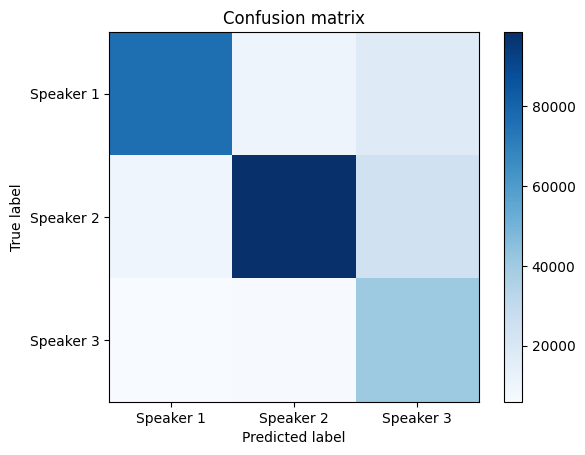

In [ ]:
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.yticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
total_correct = np.sum(np.diag(cm))
total = np.sum(cm)
accuracy = total_correct / total
print("Accuracy:", accuracy)

Accuracy: 0.7443563590660801


# Diarization

In [ ]:
%%capture
!pip install SpeechRecognition

In [ ]:
import torch
import numpy as np
import speech_recognition as Sr
from pydub import AudioSegment
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript
import IPython.display as ipd
import librosa
from scipy.io.wavfile import write
from pydub import AudioSegment
from pydub.silence import split_on_silence
import time


RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=2, filename='recorded_sound.wav'):
  while True:
    print()
    print("Speak Now...")
    print()
    display(Javascript(RECORD))
    sec += 1
    s = output.eval_js('record(%d)' % (sec*1000))
    #print("Done Recording !")
    b = b64decode(s.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(b)
    webm_audio = AudioSegment.from_file("recorded_sound.wav", format="webm")
    webm_audio.export("recorded_sound.wav", format="wav")
    r = Sr.Recognizer()
    with Sr.AudioFile('recorded_sound.wav') as source:
        #r.adjust_for_ambient_noise(source, duration=5)
        #r.dynamic_energy_threshold = True
        audio = r.record(source)

    y,sr = librosa.load('recorded_sound.wav')

    df = pd.DataFrame()
    mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
    df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

    df_filtered = df[(df != 0).all(1)]

    from sklearn.preprocessing import StandardScaler

    z = StandardScaler()
    J = z.fit_transform(df_filtered)

    J = pd.DataFrame(Y)

    text = r.recognize_google(audio)

    # Make a prediction
    score_speaker1 = gmm_speaker1.score(J.values[100].reshape(1, -1))
    score_speaker2 = gmm_speaker2.score(J.values[100].reshape(1, -1))
    score_speaker3 = gmm_speaker3.score(J.values[100].reshape(1, -1))

    if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
        print("Prime Minister Modi: ",end = " ")
    elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
        print("President Emmanuel Macron: ",end=" ")
    else:
        print("President Obama: ",end=" ")
    print(text)
    time.sleep(2)
    if text == 'stop recording':
      break

  return None


record()

# HOME

In [ ]:
%%capture
!pip install pytube
!pip install moviepy
!pip install pydub

import pandas as pd
import numpy as np
from plotnine import *
from pytube import YouTube
from moviepy.editor import *
import os
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pydub
from sklearn.cluster import KMeans
from pydub import AudioSegment
from pydub.silence import split_on_silence
import librosa

# 20 sec

In [ ]:
mp3_file = '/content/drive/MyDrive/GMM_HOME/Amma_1.mp3'
wav_filename = "amma1.wav"
track = AudioSegment.from_file(mp3_file,  format= 'mp3')
file_handle = track.export(wav_filename, format='wav')
file_path = "amma1.wav"
file_name = file_path.split('/')[-1]
audio_format = "wav"
sound = AudioSegment.from_file(file_path, format = audio_format)
audio_chunks = split_on_silence(sound
                            ,min_silence_len = 100
                            ,silence_thresh = -45
                            ,keep_silence = 50
                        )
combined = AudioSegment.empty()
for chunk in audio_chunks:
    combined += chunk
combined.export('amma1.wav', format = audio_format)
y,sr = librosa.load('amma1.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)


mp3_file = '/content/drive/MyDrive/GMM_HOME/Amma_2.mp3'
wav_filename = "amma2.wav"
track = AudioSegment.from_file(mp3_file,  format= 'mp3')
file_handle = track.export(wav_filename, format='wav')
file_path = "amma2.wav"
file_name = file_path.split('/')[-1]
audio_format = "wav"
sound = AudioSegment.from_file(file_path, format = audio_format)
audio_chunks = split_on_silence(sound
                            ,min_silence_len = 100
                            ,silence_thresh = -45
                            ,keep_silence = 50
                        )
combined = AudioSegment.empty()
for chunk in audio_chunks:
    combined += chunk
combined.export('amma2.wav', format = audio_format)
y,sr = librosa.load('amma2.wav')
y, _ = librosa.effects.trim(y)
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
X = z.fit_transform(df_filtered)

X = pd.DataFrame(X)

X

# 1 min

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.797991,-0.938645,1.345276,-0.580011,-1.010738,0.342058,0.923949,1.365278,1.275235,1.206792,1.393405,-0.016874,-0.379658,-0.014063,0.391021,0.988875,0.280345,-0.151806,0.071975,0.137548
1,-1.853138,-1.165049,1.018182,-0.732079,-0.553846,1.167936,1.940562,1.686601,0.741729,0.348579,1.115237,0.491079,0.184897,-0.067770,-0.093275,0.563926,-0.168471,-0.651877,-0.266975,-0.207479
2,-1.775793,-0.988601,1.098308,-0.769305,-0.853107,0.733798,1.429746,1.557751,0.847583,0.186777,0.541504,-0.016857,-0.064013,-0.314468,-0.517808,0.262171,-0.316263,-0.624912,0.176013,0.789417
3,-1.891796,-1.198553,1.191641,-0.460893,-0.573977,0.633402,1.319668,1.902700,1.521864,1.168958,1.742591,0.865782,-0.053123,-0.938360,-0.918515,0.494926,0.153636,-0.444073,-0.163943,-0.002813
4,-1.688065,-0.685199,1.507081,-0.414792,-0.657701,0.494010,0.700500,0.781718,0.728035,0.839313,1.445189,0.437282,-0.011876,-0.435449,-0.840828,0.125063,0.438905,0.800900,0.465116,-0.423356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95926,-1.318918,-0.659742,1.003818,-0.595932,-0.217801,0.743944,1.104065,1.428907,0.484053,-0.454203,0.305478,-0.277706,-0.936909,-0.652787,0.295871,1.163068,0.616951,0.738832,0.921425,0.301967
95927,-1.324123,-0.811228,0.748973,-0.533148,0.474239,0.990234,0.231987,0.544452,1.048464,0.747438,1.002337,0.763544,0.869241,-0.149595,-0.594819,0.460188,-0.263424,-0.616127,0.209988,0.655231
95928,-1.419763,-0.841898,1.035071,-0.365880,0.521220,1.480230,1.659116,1.805646,1.389034,0.815907,0.870398,-0.226710,-0.671401,-0.634806,-0.249045,0.983071,1.404448,2.039278,1.725397,0.447136
95929,-1.438925,-1.106664,0.705671,-0.354608,0.649945,1.555736,1.649674,1.340544,0.783087,0.686366,1.444984,0.495528,-0.291730,-0.669682,-0.283145,0.493044,-0.047507,0.363753,0.877288,0.561436


In [ ]:
mp3_file = '/content/drive/MyDrive/GMM_HOME/Lakshmi_2.mp3'
wav_filename = "lakshmi1.wav"
track = AudioSegment.from_file(mp3_file,  format= 'mp3')
file_handle = track.export(wav_filename, format='wav')
file_path = "lakshmi1.wav"
file_name = file_path.split('/')[-1]
audio_format = "wav"
sound = AudioSegment.from_file(file_path, format = audio_format)
audio_chunks = split_on_silence(sound
                            ,min_silence_len = 100
                            ,silence_thresh = -45
                            ,keep_silence = 50
                        )
combined = AudioSegment.empty()
for chunk in audio_chunks:
    combined += chunk
combined.export('lakshmi1.wav', format = audio_format)
y,sr = librosa.load('lakshmi1.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)

Y

# 1 min

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.505960,-3.626941,-0.262420,-0.339724,0.165007,1.063844,1.421627,0.525504,0.681835,0.098875,0.800874,0.847573,0.940162,0.739752,0.580684,0.780075,0.778677,0.786138,0.722843,0.845405
1,0.466681,-1.436885,-2.916820,-0.861933,-2.915145,-1.198940,-0.274716,0.445401,0.161857,0.080103,0.517827,-0.177169,0.826555,-0.625171,-1.042874,1.139157,1.511520,-0.223203,0.952843,1.258205
2,2.328298,-1.274488,-2.465397,0.048565,-1.568408,-0.255227,-0.199111,1.525516,0.056687,0.710032,0.500654,-0.578819,-1.439917,-1.549403,-1.932231,1.302288,1.134476,1.285804,2.621525,1.404568
3,1.553753,-2.033796,-1.594332,0.293721,-1.686693,-1.314415,-0.890973,3.102304,-1.977437,-0.251110,2.260044,-0.670094,-2.480131,-0.631234,-2.618011,2.094095,2.151228,3.970111,6.864375,3.177740
4,1.323153,-2.282962,-1.776937,0.348829,-1.432555,-1.815794,-0.919852,1.363641,-2.556259,-0.681975,0.948585,-0.817952,-2.687829,-1.435619,-3.137666,1.141819,1.260936,3.374671,7.090606,1.965959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72354,-1.539826,-0.140870,0.745587,-0.783457,-0.753429,-0.164108,0.401669,0.193024,0.847839,-0.008245,0.326669,0.595640,1.201510,1.210557,0.999528,1.413930,1.864365,2.208874,1.767782,0.690025
72355,-1.742957,-0.463160,0.797153,-0.336396,0.397281,1.323860,1.346220,0.030343,0.424551,0.531856,1.319522,0.311091,-0.006066,0.454595,0.534042,0.441975,0.363890,0.683981,0.961393,0.749171
72356,-1.611875,-0.303220,0.566254,-0.895484,-0.217078,1.125881,1.283258,-0.193347,0.086063,-0.164859,0.783788,0.620367,0.325332,-0.273016,-0.191232,0.690139,0.705080,0.046435,-0.123308,0.347183
72357,-1.635542,-0.308750,0.820278,-0.299399,0.450158,1.417597,1.586705,0.314811,0.311349,-0.211989,0.162575,-0.335077,-0.310547,-0.624523,-0.870897,-0.024101,0.942906,1.400245,0.972484,-0.090164


In [ ]:
mp3_file = '/content/drive/MyDrive/GMM_HOME/me_1.mp3'
wav_filename = "me.wav"
track = AudioSegment.from_file(mp3_file,  format= 'mp3')
file_handle = track.export(wav_filename, format='wav')
file_path = "me.wav"
file_name = file_path.split('/')[-1]
audio_format = "wav"
sound = AudioSegment.from_file(file_path, format = audio_format)
audio_chunks = split_on_silence(sound
                            ,min_silence_len = 100
                            ,silence_thresh = -45
                            ,keep_silence = 50
                        )
combined = AudioSegment.empty()
for chunk in audio_chunks:
    combined += chunk
combined.export('me.wav', format = audio_format)
y,sr = librosa.load('me.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)

Z

# 40 sec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.189849,-1.274880,0.559337,-0.602980,-1.324961,-1.608722,-0.202859,-0.504030,0.567681,1.169311,0.844174,0.500781,0.663427,0.451454,-0.460530,-0.791839,-0.135812,-0.091347,0.113624,-0.422257
1,-2.003216,-1.111364,0.561087,-0.073973,-0.389212,-0.923591,-0.190651,-0.721953,-0.325659,0.184206,1.077038,1.717726,1.254050,1.000202,1.172711,0.595952,0.108775,-0.342892,0.445125,0.492602
2,-1.885032,-0.914873,0.633824,-0.345288,-0.584219,-0.355447,0.943219,1.008318,1.488327,1.127755,0.492219,0.057817,-0.164946,-0.058414,0.362752,0.119863,-0.528557,-0.993723,0.305438,0.465436
3,-1.726420,-1.014644,-0.092567,-0.221517,0.075571,-0.305023,0.015925,-0.637915,0.712285,2.128004,1.933449,0.838624,0.834191,1.194071,0.743556,0.417615,0.713707,0.030945,0.294669,0.248587
4,-1.129568,-0.911743,-0.587701,0.264126,0.342781,-1.508493,-0.177187,1.241570,0.739497,0.479978,1.549581,0.735514,0.542155,0.648562,0.693189,0.368771,1.325382,0.409987,-0.010034,0.796074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77105,-1.698580,-0.750257,0.425168,-0.586695,-0.725376,-0.670351,0.510582,0.413600,0.992384,0.780915,0.310558,0.399703,0.508142,-0.289957,-1.422205,-1.273178,-0.373096,-0.115645,0.854122,0.767423
77106,-1.749627,-0.702822,0.860975,-0.117904,-0.329809,-0.228038,0.696761,0.311895,0.376711,-0.129761,-0.250819,0.752159,1.746480,1.580555,0.944038,0.094978,-0.809356,-2.007829,-0.482713,0.902146
77107,-1.744087,-0.832330,0.314459,-0.516865,-0.197693,0.694837,1.477183,0.470101,0.237937,0.266112,0.350254,0.730811,0.916544,0.420085,0.330840,1.017203,1.030239,-0.398923,0.088438,0.346265
77108,0.393726,-0.533355,-0.988507,0.554544,0.512752,0.930256,1.080379,0.670738,1.754620,1.923576,1.475297,1.248466,1.017942,-0.156544,-0.312445,-0.255935,-0.444110,0.538597,-0.398859,0.312408


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_components = 5 # Number of components for the GMM
gmm_speaker1 = GaussianMixture(n_components=n_components)
gmm_speaker1.fit(X.values)
gmm_speaker2 = GaussianMixture(n_components=n_components)
gmm_speaker2.fit(Y.values)
gmm_speaker3 = GaussianMixture(n_components=n_components)
gmm_speaker3.fit(Z.values)
means1 = gmm_speaker1.means_
covariances1 = gmm_speaker1.covariances_
weights1 = gmm_speaker1.weights_
means2 = gmm_speaker2.means_
covariances2 = gmm_speaker2.covariances_
weights2 = gmm_speaker2.weights_
means3 = gmm_speaker3.means_
covariances3 = gmm_speaker3.covariances_
weights3 = gmm_speaker3.weights_

# 1 min

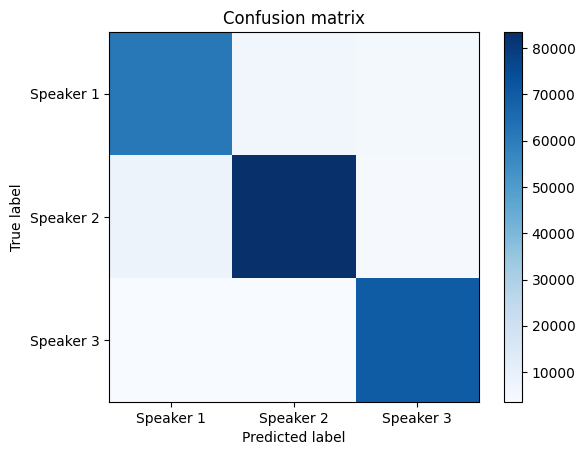

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
true_labels=[1 for i in range(len(X))];t=[0 for i in range(len(Y))];tt=[2 for i in range(len(Z))]
true_labels.extend(t);true_labels.extend(tt)
predictions = []
for row in X.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))
  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
    predictions.append(2)
  else:
    predictions.append(0)

for row in Y.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
    predictions.append(2)
  else:
    predictions.append(0)

for row in Z.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))
  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
    predictions.append(2)
  else:
    predictions.append(0)

cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.yticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
total_correct = np.sum(np.diag(cm))
total = np.sum(cm)
accuracy = total_correct / total
print("Accuracy:", accuracy)

Accuracy: 0.874759576202119


In [ ]:
from sklearn.mixture import GaussianMixture
import joblib

joblib.dump(gmm_speaker1, 'Amma.pkl')
gmm_speaker1 = joblib.load('Amma.pkl')

joblib.dump(gmm_speaker2, 'Lakshmi.pkl')
gmm_speaker2 = joblib.load('Lakshmi.pkl')

joblib.dump(gmm_speaker3, 'Krishna.pkl')
gmm_speaker3 = joblib.load('Krishna.pkl')

In [ ]:
import librosa

# Load the audio file
audio, sr = librosa.load('audio.wav')

# Trim the silence from the audio
audio_trimmed, _ = librosa.effects.trim(audio)

import IPython.display as ipd

ipd.Audio(data=audio_trimmed,rate=sr)

# Gender classification

In [ ]:
%%capture
!pip install pydub

Male dataset

In [ ]:
import os
from pytube import YouTube
from moviepy.editor import *
import librosa
from pydub import AudioSegment
import pandas as pd

df = pd.DataFrame()
urls = ['https://www.youtube.com/shorts/t3ROexSpb68',
        'https://www.youtube.com/shorts/8jK3FGse8UQ',
        'https://www.youtube.com/shorts/y4ep3IbTLkE',
        'https://www.youtube.com/shorts/_Nbwys56lPs',
        'https://www.youtube.com/shorts/kfDedc1qBtU']

for url in urls:
  
  yt = YouTube(url)
  yt.streams.filter(only_audio=True).first().download()
  dirs = os.listdir()
  for i in dirs:
    if '.mp4' in i or '.m4a' in i:
      m4a_file = i
      wav_filename = i
      try: track = AudioSegment.from_file(m4a_file,  format= 'm4a')
      except: track = AudioSegment.from_file(m4a_file,  format= 'mp4') 
      file_handle = track.export(wav_filename, format='wav')

      y,sr = librosa.load(wav_filename)

      mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
      df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)
      os.remove(i)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)

Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.001619,-1.447530,0.016472,-0.843756,-0.141598,0.176748,0.511616,0.131152,0.797938,-0.027883,0.529666,0.037838,0.327079,0.363959,0.223272,0.134914,0.842792,0.196539,0.338588,0.616746
1,-1.928187,-1.260955,0.281275,-0.579029,0.031362,0.326200,0.640408,0.109095,0.673330,-0.228468,0.273877,-0.314339,0.027133,0.068876,-0.023503,-0.024952,0.715845,0.122523,0.380734,0.774517
2,-1.618015,-0.618445,0.896911,0.209339,0.552566,0.422334,0.562601,-0.425193,-0.346886,-1.127819,-0.802737,-2.330625,-1.280101,-0.592503,-0.805443,-0.940151,-0.217211,-0.700361,-0.228125,0.067017
3,-1.415806,-0.328021,1.039174,0.355562,0.936017,0.491581,-0.286627,-0.944010,-0.664675,-1.309890,-0.709998,-1.573154,-1.814295,-1.372414,-0.930322,-0.937704,-0.705217,-0.690298,0.627898,0.322798
4,-1.411255,-0.206555,1.394696,0.535255,0.903598,0.688415,0.356976,-0.420381,-0.627507,-1.466337,-0.636004,-1.526225,-1.348082,-1.037865,-0.992588,-0.752753,0.170079,-0.794979,-0.780324,-0.078634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,-0.184114,0.460038,0.635114,0.251213,0.594856,1.095449,0.590044,0.752343,1.057304,0.648689,1.103254,1.021274,0.604819,0.674096,-0.007729,0.182800,0.938877,0.664864,0.704896,1.616017
22051,-1.922780,-1.155744,0.437859,-0.439542,0.173173,0.440652,0.774254,0.333236,0.989323,0.125295,0.655615,0.231623,0.476600,0.437706,0.249658,0.111643,0.739120,0.020774,0.175391,0.423035
22052,-1.970070,-1.275135,0.310176,-0.497937,0.200621,0.555708,0.975860,0.520246,1.225088,0.405293,0.875520,0.471382,0.698960,0.693488,0.551243,0.428952,1.115711,0.475565,0.574198,0.845669
22053,-2.001564,-1.367400,0.155998,-0.673712,0.034359,0.381971,0.777491,0.366995,1.071202,0.262591,0.769843,0.343755,0.586158,0.581125,0.414897,0.271981,0.925196,0.222181,0.299988,0.508996


In [ ]:
import os
from pytube import YouTube
from moviepy.editor import *
import librosa
from pydub import AudioSegment
import pandas as pd

df = pd.DataFrame()
urls = ['https://www.youtube.com/shorts/M36ysmarHQs',
        'https://www.youtube.com/shorts/qxd3fgbwTvc',
        'https://www.youtube.com/watch?v=wSVajQn90HM',
        'https://www.youtube.com/watch?v=s-i3Z7EZRpA',
        'https://www.youtube.com/watch?v=A9fGG8gvE9U']

for url in urls:
  
  yt = YouTube(url)
  yt.streams.filter(only_audio=True).first().download()
  dirs = os.listdir()
  for i in dirs:
    if '.mp4' in i or '.m4a' in i:
      m4a_file = i
      wav_filename = i
      try: track = AudioSegment.from_file(m4a_file,  format= 'm4a')
      except: track = AudioSegment.from_file(m4a_file,  format= 'mp4') 
      file_handle = track.export(wav_filename, format='wav')

      y,sr = librosa.load(wav_filename)

      mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
      df = df.append(np.ndarray.tolist(mfc.T), ignore_index = True)
      os.remove(i)

df_filtered = df[(df != 0).all(1)]

from sklearn.preprocessing import StandardScaler

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)

Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.425895,-1.750319,0.107744,-0.676898,0.222161,0.786896,0.755552,0.708353,0.760987,0.717119,1.024363,0.586330,1.026832,0.708135,0.808113,1.214551,0.793277,0.510037,0.867399,0.729544
1,-3.416590,-1.725650,0.141078,-0.635849,0.266914,0.829370,0.795213,0.738123,0.777384,0.720711,1.014678,0.565128,1.001431,0.671836,0.768746,1.180146,0.757047,0.481702,0.847517,0.716647
2,-3.387419,-1.653939,0.229733,-0.519988,0.398619,0.944211,0.915828,0.892070,0.944715,0.892483,1.238117,0.840395,1.238850,0.931965,1.031780,1.408544,0.965286,0.621184,0.962873,0.817739
3,-2.490735,-1.040625,-0.945531,-0.364756,0.145129,-0.885153,0.381726,0.931213,0.848916,0.992357,0.201886,-0.179072,1.099608,0.274621,0.507939,1.988894,1.161689,-0.517966,0.547817,1.535040
4,-1.929932,-1.184156,-1.872139,-0.156275,-0.364878,-0.712048,0.305534,-0.040707,0.623268,1.214564,0.778445,1.010385,0.530854,-0.336391,0.508028,0.508781,-0.058598,-1.106877,-0.285620,0.523965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203052,-1.810015,-1.772283,0.076407,-0.719286,0.169058,0.725683,0.680734,0.625782,0.676577,0.627036,0.922436,0.482636,0.937497,0.599021,0.695553,1.112758,0.673223,0.395376,0.757672,0.614247
203053,-1.810146,-1.772635,0.075914,-0.719933,0.168282,0.724840,0.679779,0.624823,0.675706,0.626234,0.921686,0.482044,0.937140,0.598778,0.695508,1.112904,0.673616,0.395961,0.758429,0.615244
203054,-1.811110,-1.775220,0.072291,-0.724686,0.162584,0.718645,0.672757,0.617774,0.669305,0.620348,0.916179,0.477689,0.934514,0.596995,0.695171,1.113974,0.676504,0.400259,0.763990,0.622568
203055,-1.810855,-1.774535,0.073252,-0.723426,0.164095,0.720288,0.674618,0.619643,0.671002,0.621908,0.917639,0.478843,0.935211,0.597467,0.695260,1.113691,0.675739,0.399120,0.762515,0.620626


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_components = 5 # Number of components for the GMM
male = GaussianMixture(n_components=n_components)
male.fit(Y.values)
female = GaussianMixture(n_components=n_components)
female.fit(Z.values)

GaussianMixture(n_components=5)

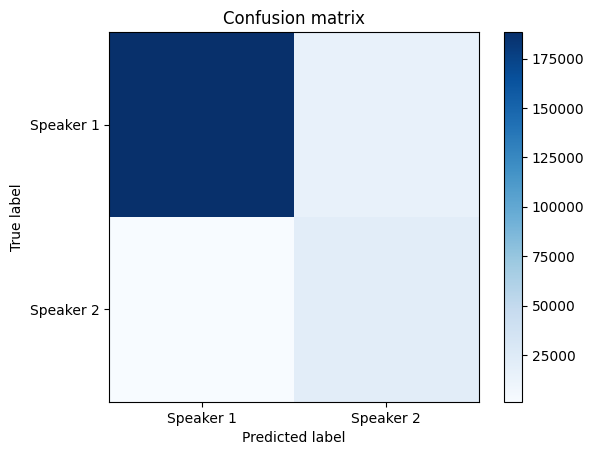

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
true_labels=[1 for i in range(len(Y))];t=[0 for i in range(len(Z))];
true_labels.extend(t);
predictions = []

for row in Y.values:
  score_speaker1 = male.score(row.reshape(1, -1))
  score_speaker2 = female.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2:
    predictions.append(1)
  else:
    predictions.append(0)

for row in Z.values:
  score_speaker1 = male.score(row.reshape(1, -1))
  score_speaker2 = female.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2:
    predictions.append(1)
  else:
    predictions.append(0)

cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1], ['Speaker 1', 'Speaker 2'])
plt.yticks([0, 1], ['Speaker 1', 'Speaker 2'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
total_correct = np.sum(np.diag(cm))
total = np.sum(cm)
accuracy = total_correct / total
print("Accuracy:", accuracy)

Accuracy: 0.928808770745229


In [ ]:
from sklearn.mixture import GaussianMixture
import joblib

joblib.dump(male, 'male.pkl')
gmm_speaker1 = joblib.load('male.pkl')

joblib.dump(female, 'female.pkl')
gmm_speaker2 = joblib.load('female.pkl')